In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\kc_house_data.csv',delimiter = ',')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# id and date are not important features w.r.t predicting the price of the house hence we'll drop it
df.drop('id',axis=1,inplace=True)

In [5]:
df.drop('date',axis=1,inplace=True)

In [6]:
df.drop('zipcode',axis=1,inplace=True)

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [8]:
# EDA --> performing correlation
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248


In [9]:
# splitting into X and Y
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [10]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [11]:
Y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [13]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
X = sc.fit_transform(X)

In [15]:
X

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [16]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split

In [28]:
X_tr,X_ts,Y_tr,Y_ts = train_test_split(X,Y,random_state=0,test_size=0.25)

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
# selecting k value
mse=[]
r2=[]
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_tr,Y_tr)
    Y_pred = model.predict(X_ts)
    error=mean_squared_error(Y_ts,Y_pred)
    mse.append(error)
    rs = r2_score(Y_ts,Y_pred)
    r2.append(rs)

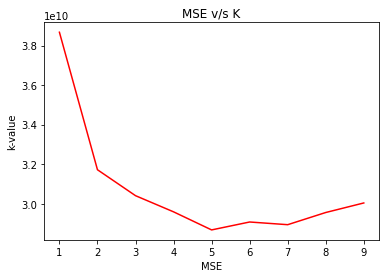

In [44]:
plt.plot(list(range(1,10)),mse,c='r')
plt.xlabel('MSE')
plt.ylabel('k-value')
plt.title('MSE v/s K')
plt.show()

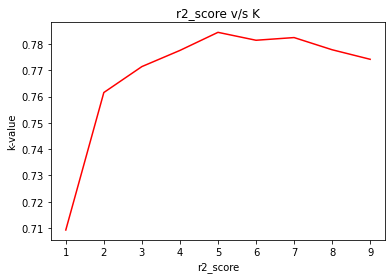

In [46]:
plt.plot(list(range(1,10)),r2,c='r')
plt.xlabel('r2_score')
plt.ylabel('k-value')
plt.title('r2_score v/s K')
plt.show()

# At k=5 , the mse(error) is very low  but the r2_score is high

In [47]:
# Model building
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_tr,Y_tr)
Y_pred = model.predict(X_ts)

In [48]:
r2_score(Y_ts,Y_pred)

0.7843926953864084

In [ ]:
# r2_score ==> the ML Model(SSR) gives 78% better prediction than the Mean Model(SST)